In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import sys,traceback

In [77]:
#Function to load the dataset

def data_init(data_filepath):
    try:
        hr = pd.read_csv(data_filepath,low_memory= False)

        col_list = list(hr)

        print("Loaded successfully.")
    
        return hr
    except:
        print("File Could not be loaded")
        print("Check your file or filepathname")
        return False

In [78]:
#User interacive way to access the dataset'''
c = 1
while (c!=0):
    data_filepath = str(input("Enter data filepath:"))
    if os.path.isfile(data_filepath) :
        hr_data = data_init(data_filepath)
    else:
        '''Add double slash in filepath and try again!'''
        data_filepath = re.escape(data_filepath)
        hr_data = data_init(data_filepath)
    if type(hr_data) != str: c = 0
    else: print ("Check if file exists in the filepath and Let's try again ! \n")

Enter data filepath:C:\Users\Vilas\Anaconda Projects\Employee Attrition case study\Attrition Case Study.csv
Loaded successfully.


In [80]:
#Import Data
hr = hr_data
col_names = hr.columns.tolist()
print("Column names:")
print(col_names)

print("\nSample data:")
hr.head()

Column names:
['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Sample data:


,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [81]:
#Display data type for each column
hr.dtypes

Attrition                    int64
Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [82]:
#Check for Missing Values
hr.isnull().any()

Attrition                   False
Age                         False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [83]:
#Summary for each variable
hr.describe()

,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,0.161224,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,0.367863,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,0.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,0.000000,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,0.000000,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,1.000000,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [84]:
print(hr['Department'].unique())


['Sales' 'Research & Development' 'Human Resources']


In [85]:
hr['Attrition'].value_counts()


0    1233
1     237
Name: Attrition, dtype: int64

In [86]:
hr.groupby('Attrition').mean()

C:\Users\Vilas\AppData\Local\Temp\ipykernel_14980\3940971941.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hr.groupby('Attrition').mean()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
0,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,...,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
1,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


In [87]:
#points to be cosidered
#1.DistanceFromHome
#2.EnvironmentSatisfaction
#3.HourlyRate
#4.JobLevel
#5.RelationshipSatisfaction
#6.WorkLifeBalance
#StockOptionLevel
#PercentSalaryHike

In [88]:
#categorical means for categorical variables such as department and PercentSalaryHike to get a more detailed sense of our data
hr.groupby('Department').mean()

C:\Users\Vilas\AppData\Local\Temp\ipykernel_14980\2007010095.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hr.groupby('Department').mean()


,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Department,,,,,,,,,,,,,,,,,,,,,
Human Resources,0.190476,37.809524,751.539683,8.698413,2.968254,1.0,1205.269841,2.682540,64.301587,2.746032,...,2.888889,80.0,0.777778,11.555556,2.555556,2.920635,7.238095,3.539683,1.777778,3.666667
Research & Development,0.138398,37.042664,806.851197,9.144641,2.899063,1.0,1006.503642,2.744017,66.167534,2.741935,...,2.708637,80.0,0.804370,11.342352,2.792924,2.725286,6.864724,4.155047,2.137357,4.084287
Sales,0.206278,36.542601,800.275785,9.365471,2.934978,1.0,1038.946188,2.679372,65.520179,2.701794,...,2.695067,80.0,0.773543,11.105381,2.847534,2.816143,7.284753,4.486547,2.354260,4.271300


In [89]:
#Points to be considered
#More Attrition from Sales Department based on----
#attrition Human Resource Department based on ----

In [90]:
hr.groupby('OverTime').mean()

C:\Users\Vilas\AppData\Local\Temp\ipykernel_14980\1636713551.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hr.groupby('OverTime').mean()


,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
OverTime,,,,,,,,,,,,,,,,,,,,,
No,0.104364,36.762808,800.170778,9.062619,2.925996,1.0,1033.953510,2.673624,65.990512,2.731499,...,2.679317,80.0,0.794118,11.217268,2.863378,2.773245,7.053131,4.296964,2.212524,4.216319
Yes,0.305288,37.331731,808.350962,9.521635,2.879808,1.0,1001.838942,2.843750,65.639423,2.725962,...,2.795673,80.0,0.793269,11.437500,2.637019,2.730769,6.894231,4.057692,2.125000,3.887019


In [91]:
hr.groupby('JobRole').mean()

C:\Users\Vilas\AppData\Local\Temp\ipykernel_14980\1510535655.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hr.groupby('JobRole').mean()


,Attrition,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
JobRole,,,,,,,,,,,,,,,,,,,,,
Healthcare Representative,0.068702,39.809160,854.251908,9.786260,2.992366,1.0,1074.786260,2.770992,66.839695,2.732824,...,2.694656,80.0,0.832061,14.068702,2.748092,2.702290,8.374046,4.862595,2.969466,4.572519
Human Resources,0.230769,35.500000,757.923077,8.173077,2.884615,1.0,1236.326923,2.596154,64.173077,2.711538,...,2.961538,80.0,0.750000,8.173077,2.557692,2.923077,5.326923,3.134615,1.269231,3.173077
Laboratory Technician,0.239382,34.096525,796.617761,9.409266,2.772201,1.0,999.200772,2.718147,66.683398,2.694981,...,2.687259,80.0,0.818533,7.656371,2.949807,2.718147,5.019305,3.200772,1.420849,3.297297
Manager,0.049020,46.764706,782.950980,8.029412,3.019608,1.0,947.598039,2.764706,66.833333,2.774510,...,2.813725,80.0,0.745098,24.549020,2.813725,2.774510,14.431373,6.450980,4.833333,6.274510
Manufacturing Director,0.068966,38.296552,796.020690,9.482759,2.896552,1.0,998.758621,2.917241,65.006897,2.682759,...,2.724138,80.0,0.813793,12.786207,2.744828,2.765517,7.600000,4.972414,2.117241,4.944828
Research Director,0.025000,44.000000,802.450000,8.437500,3.125000,1.0,989.787500,2.500000,63.762500,2.775000,...,2.687500,80.0,0.850000,21.400000,2.775000,2.862500,10.937500,6.287500,3.187500,6.075000
Research Scientist,0.160959,34.236301,800.359589,9.013699,2.914384,1.0,1003.486301,2.726027,66.708904,2.797945,...,2.705479,80.0,0.773973,7.715753,2.664384,2.678082,5.113014,3.273973,1.506849,3.208904
Sales Executive,0.174847,36.889571,802.098160,9.659509,3.015337,1.0,1051.092025,2.671779,65.438650,2.714724,...,2.702454,80.0,0.819018,11.101227,2.831288,2.803681,7.496933,4.855828,2.484663,4.677914
Sales Representative,0.397590,30.361446,811.349398,8.662651,2.530120,1.0,1040.253012,2.734940,64.337349,2.650602,...,2.602410,80.0,0.626506,4.674699,3.012048,2.891566,2.915663,2.012048,1.060241,1.662651


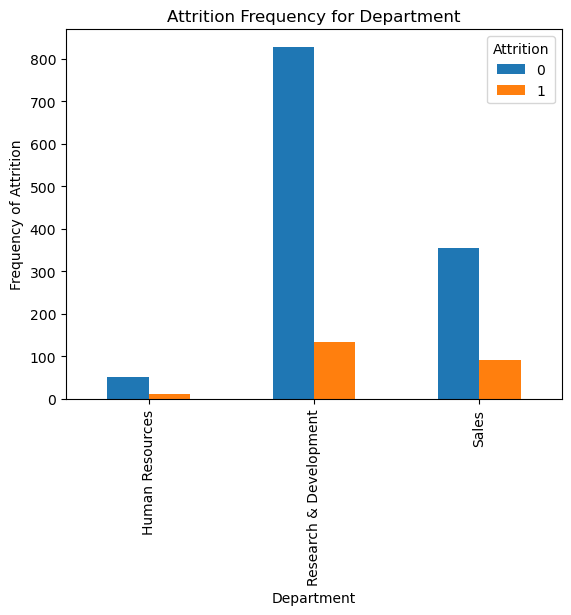

In [92]:
%matplotlib inline

#Bar chart for department employee work for and the frequency of Attrition
pd.crosstab(hr.Department,hr.Attrition).plot(kind='bar')
plt.title('Attrition Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Attrition')
plt.savefig('department_bar_chart')

In [93]:
#Points to be considered
#It is evident that the frequency of employee turnover depends a great deal on the department they work for. Thus, department can be a good predictor of the outcome variable.

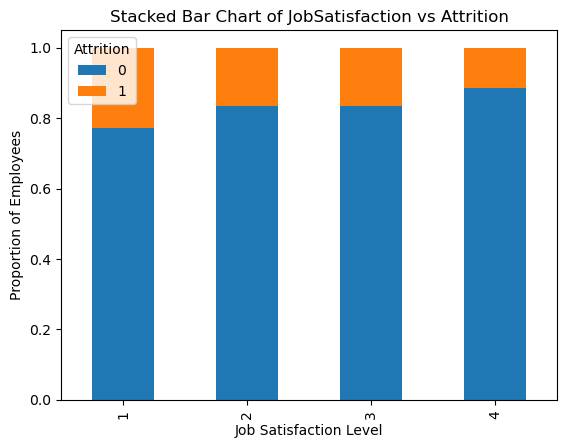

In [94]:
#Bar chart for employee salary level and the frequency of Attrition
table=pd.crosstab(hr.JobSatisfaction, hr.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of JobSatisfaction vs Attrition')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

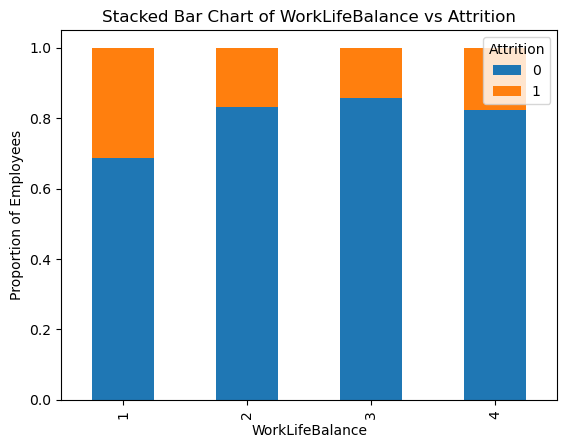

In [95]:
#Bar chart for employee salary level and the frequency of Attrition
table=pd.crosstab(hr.WorkLifeBalance, hr.Attrition)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of WorkLifeBalance vs Attrition')
plt.xlabel('WorkLifeBalance')
plt.ylabel('Proportion of Employees')
plt.savefig('WorkLifeBalance_bar_chart')

In [96]:
#The proportion of the employee turnover depends a great deal on their Job Satisfaction Level; hence, Job Satisfaction Level and Worki life balance  can be a good predictor in predicting the outcome.

In [97]:
#Proportion of employees left by department
pd.crosstab(hr.Department, hr.Attrition)

Attrition,0,1
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


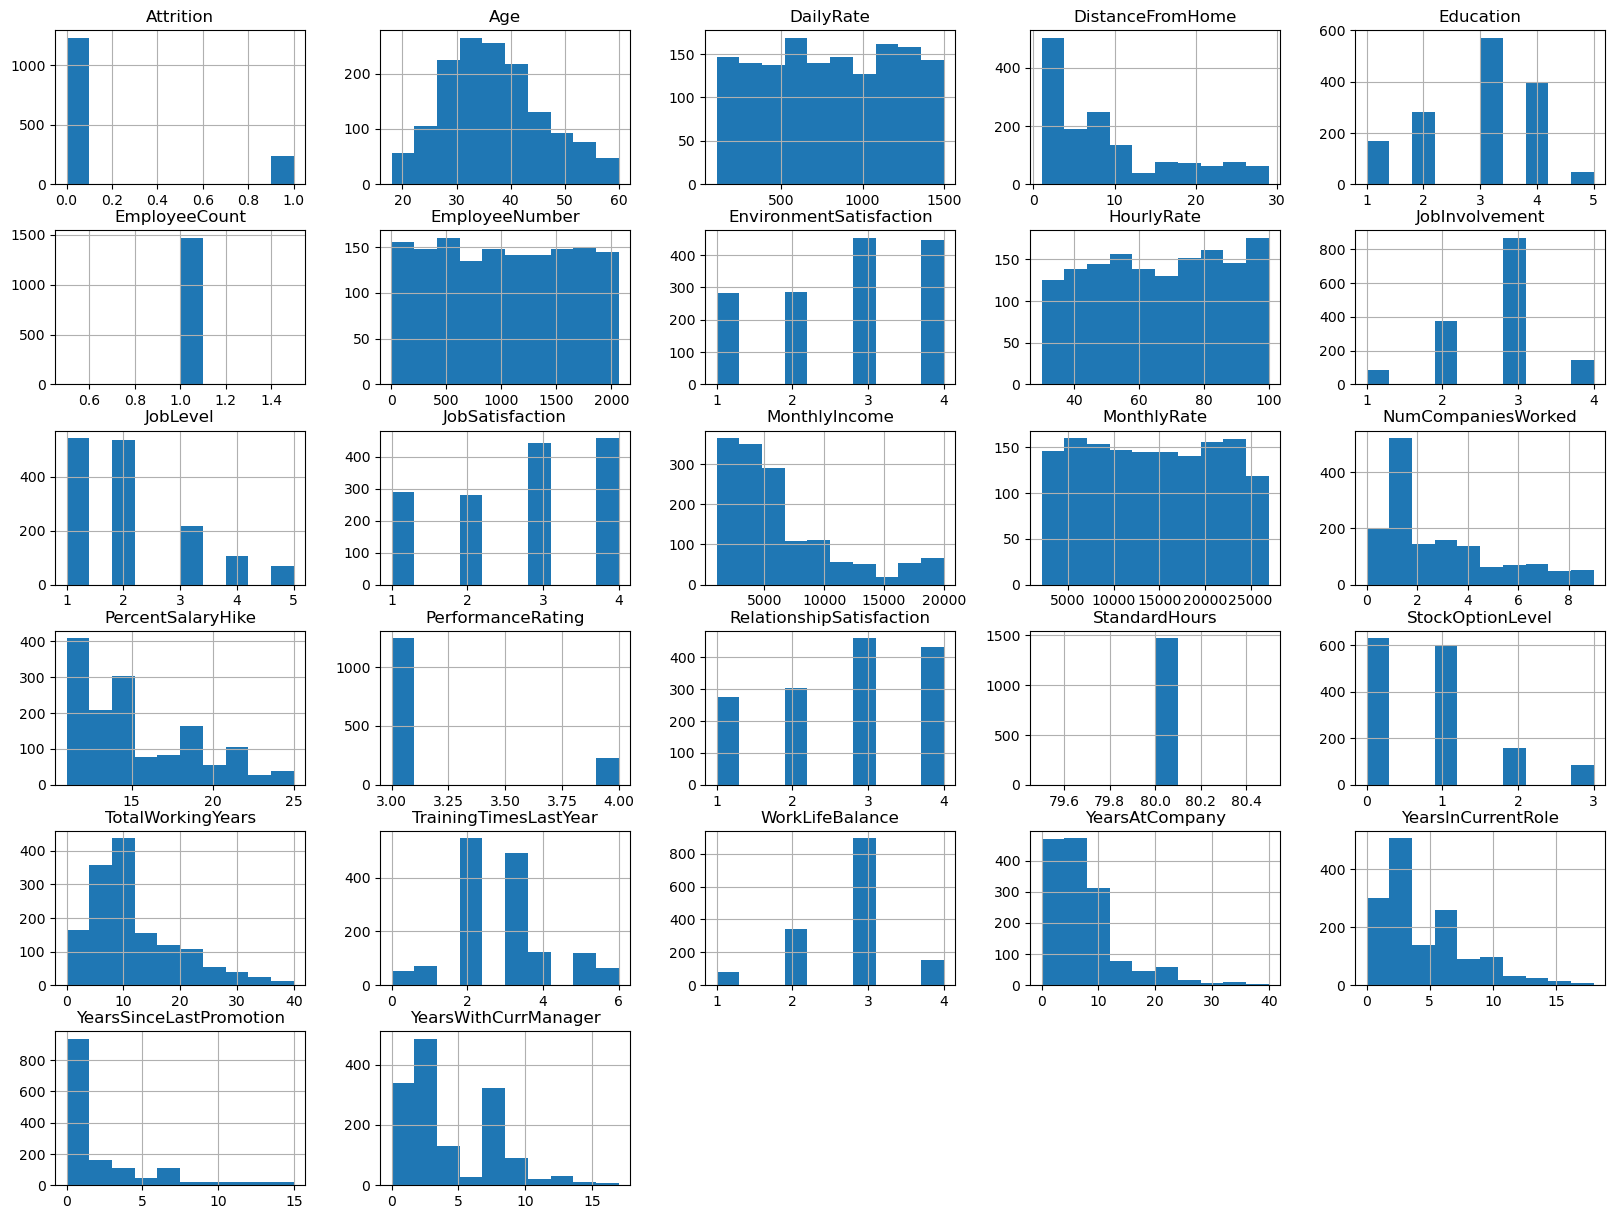

In [98]:
#Histogram of numeric variables
import matplotlib.pyplot as plt
num_bins = 10
hr.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

In [99]:
hr.head()

,Attrition,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,0,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,1,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,0,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,0,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [100]:
# #creating dummy variables for Department and Overtime(these are categorical variable)
# cat_vars=['Department','OverTime']
# for var in cat_vars:
#     cat_list='var'+'_'+var
#     cat_list = pd.get_dummies(hr[var], prefix=var)
#     hr1=hr.join(cat_list)
#     hr=hr1


In [101]:
# hr.drop(hr.columns[[8, 9]], axis=1, inplace=True)

In [103]:
hr.columns.values

array(['Attrition', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype=object)

In [106]:
hr_vars=hr.columns.values.tolist()
y=['left']
X=[i for i in hr_vars if i not in y]

In [110]:
# from sklearn.feature_selection import RFE
# from sklearn.linear_model import LogisticRegression

# #Recursive Feature Elimination (RFE)
# model = LogisticRegression()

# rfe = RFE(model, 10)
# rfe = rfe.fit(hr[X], hr[y])
# print(rfe.support_)
# # print(rfe.ranking_)

TypeError: RFE.__init__() takes 2 positional arguments but 3 were given

In [111]:
# cols=['satisfaction_level', 'last_evaluation_rating', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
#       'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'] 
# X=hr[cols]
# y=hr['left']

KeyError: "None of [Index(['satisfaction_level', 'last_evaluation_rating', 'time_spend_company',\n       'Work_accident', 'promotion_last_5years', 'department_RandD',\n       'department_hr', 'department_management', 'salary_high', 'salary_low'],\n      dtype='object')] are in the [columns]"